## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

## Load the dataset

In [5]:
data = pd.read_csv('transaction_anomalies_dataset.csv')
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


## Checking for null values 

In [7]:
null_values = data.isnull().sum()
print("Null Values in Dataset:")
print(null_values)


Null Values in Dataset:
Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  

## Column Info

In [43]:
print("\nColumn Information:")
print(data.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
 12  Anomaly                      1000 non-null   int32  
 13

## Descriptive Statistics

In [11]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225               

## Distribution of Transaction Amounts

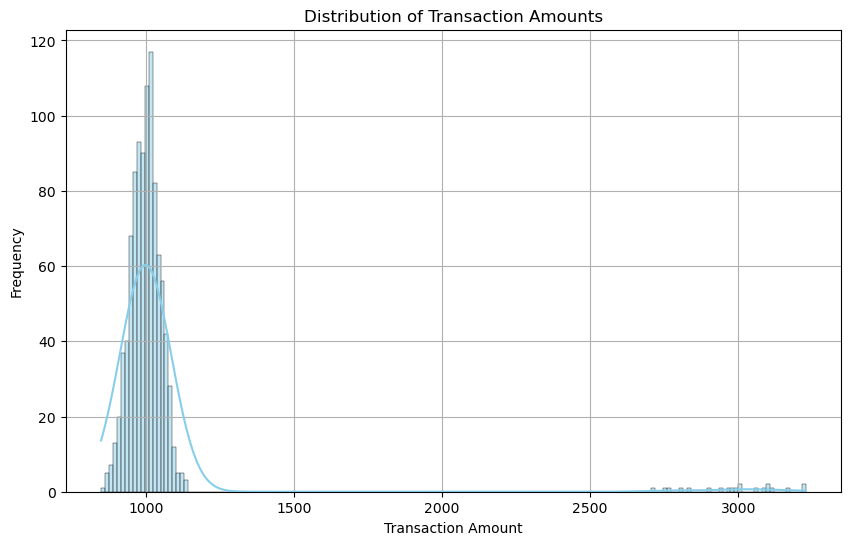

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Distribution of Transaction Amounts by Account Type

C:\Users\dambr\AppData\Local\Temp\ipykernel_9132\3877512871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data, palette='Set2')


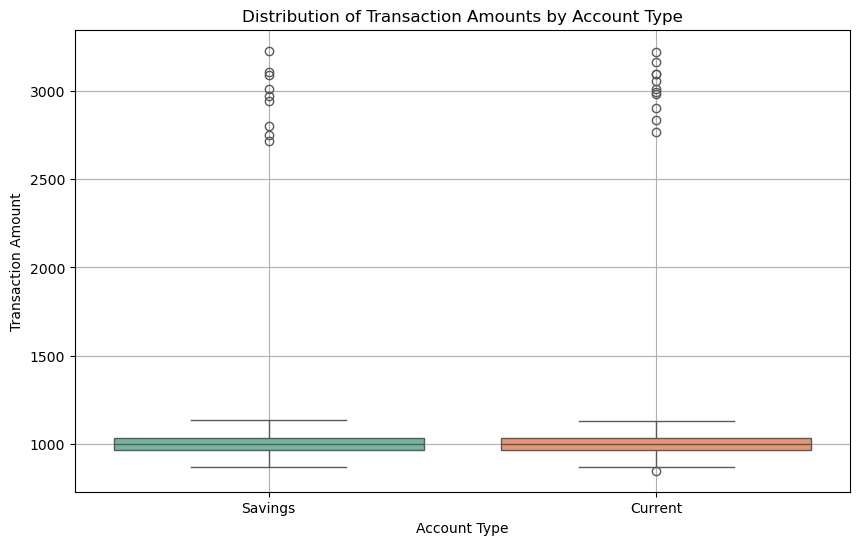

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data, palette='Set2')
plt.title('Distribution of Transaction Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

## Average Transaction Amount by Age

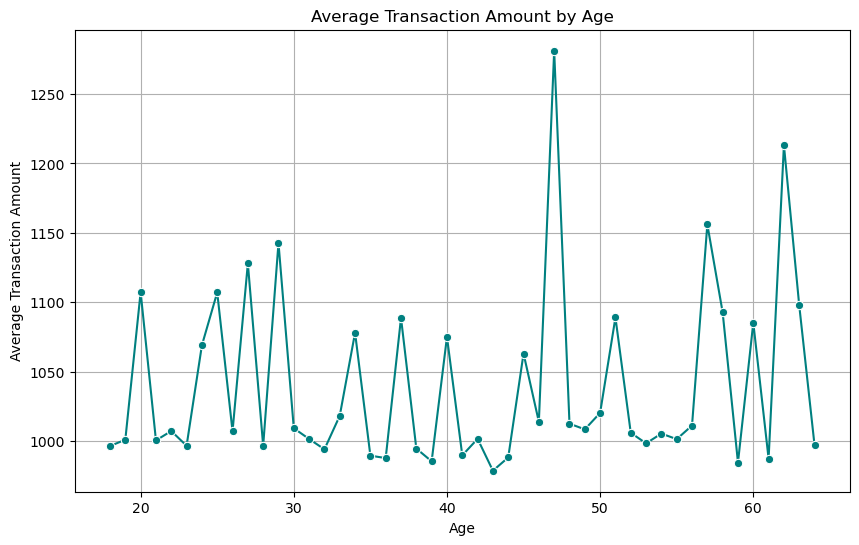

In [17]:
avg_transaction_by_age = data.groupby('Age')['Transaction_Amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Transaction_Amount', data=avg_transaction_by_age, marker='o', color='teal')
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.show()

## Count of Transactions by Day of the Week

C:\Users\dambr\AppData\Local\Temp\ipykernel_9132\4042774008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='Transaction_Count', data=transaction_count_by_day, palette='viridis')


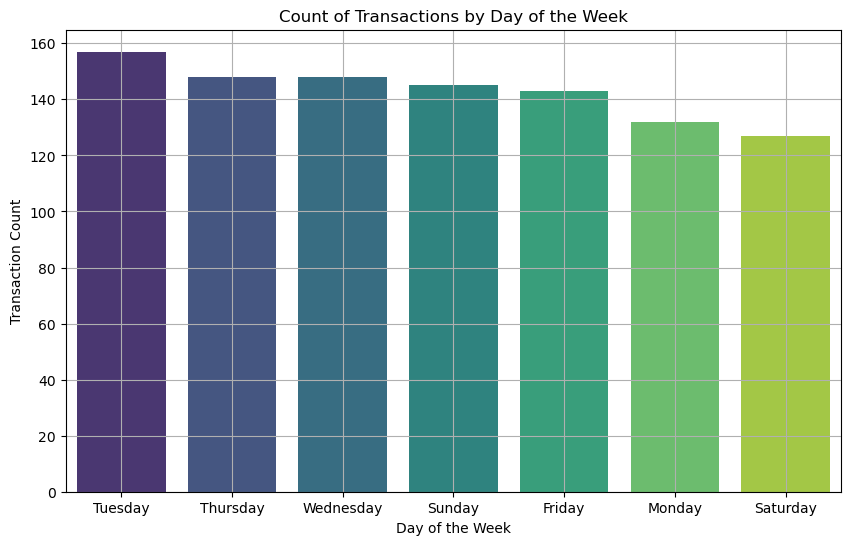

In [19]:
transaction_count_by_day = data['Day_of_Week'].value_counts().reset_index()
transaction_count_by_day.columns = ['Day_of_Week', 'Transaction_Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Transaction_Count', data=transaction_count_by_day, palette='viridis')
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

## Correlation between all columns

<Figure size 1200x800 with 0 Axes>

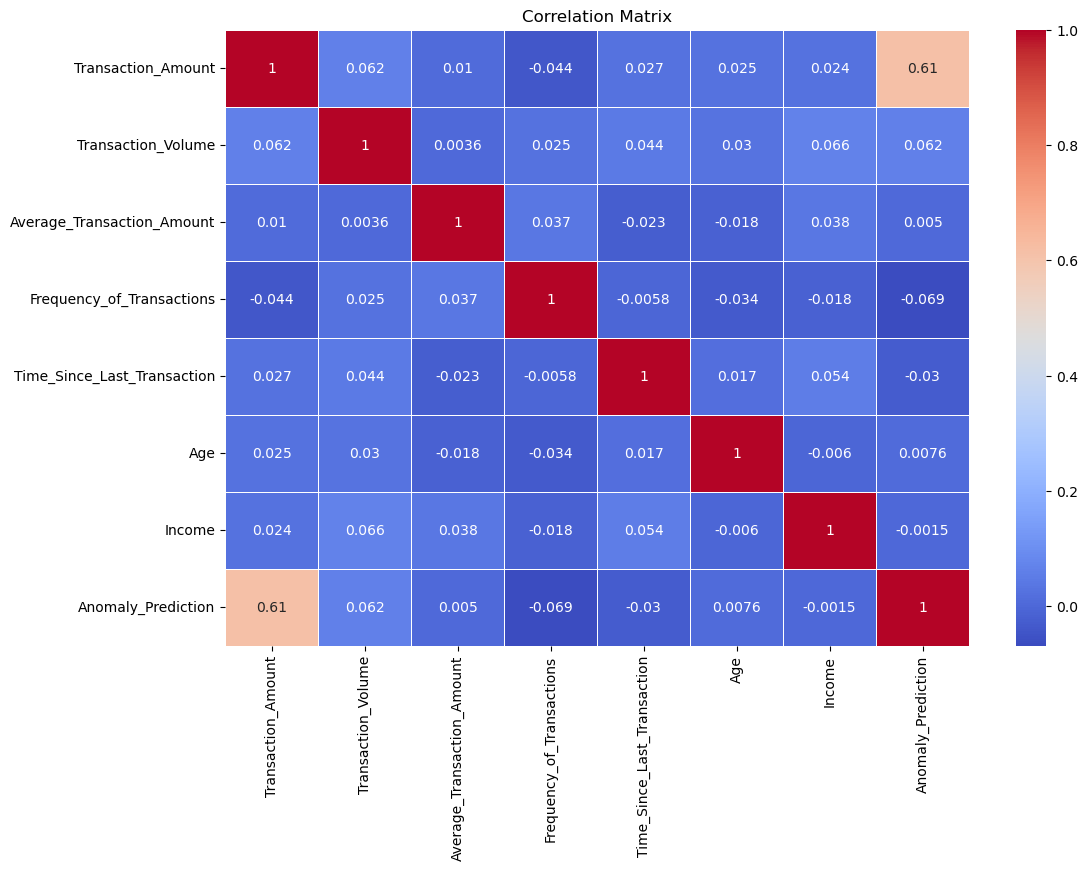

In [51]:
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5);
plt.title('Correlation Matrix')
plt.show()


## Visualizing Anomalies (using Isolation Forest)

In [23]:
iso_forest = IsolationForest(contamination=0.05)
data['Anomaly'] = iso_forest.fit_predict(data[['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                                               'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']])


## Calculating the number of Anomalies

In [25]:
anomalies_count = data['Anomaly'].value_counts()
print("Number of Anomalies:")
print(anomalies_count)

Number of Anomalies:
Anomaly
 1    950
-1     50
Name: count, dtype: int64


## Training Isolation Forest and Converting Predictions into binary values

In [27]:
iso_forest = IsolationForest(contamination=0.05)
data['Anomaly_Prediction'] = iso_forest.fit_predict(data[['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                                                           'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']])
data['Anomaly_Prediction'] = data['Anomaly_Prediction'].map({1: 0, -1: 1})  # 1 indicates anomaly, 0 indicates normal

# Classification Report

In [29]:
print("Classification Report:")
print(classification_report(data['Anomaly'], data['Anomaly_Prediction']))

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        50
           0       0.00      0.00      0.00         0
           1       0.14      0.01      0.01       950

    accuracy                           0.01      1000
   macro avg       0.05      0.00      0.00      1000
weighted avg       0.13      0.01      0.01      1000



C:\Users\dambr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dambr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dambr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dambr\anaconda3\Lib\site-packages\sklea